In [75]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
from utils import *

# Explore derStandard.at Postings

In [54]:
df = load_data()

In [55]:
df.head()

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article,ArticlePublishingDate,ArticleTitle,ArticleChannel,ArticleRessortName,UserCommunityName,UserGender,UserCreatedAt
0,1041073586,1.041073e+09,671476,Das hat gestern bereits der Voggenhuber angefü...,schieder hatte dem inhaltlich nichts entgegenz...,2019-05-01 18:21:15.127,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
1,1041073839,1.041073e+09,566938,NaN,...und meinen Bezirk bekommst du als Erbe mit.,2019-05-01 18:28:22.040,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,AlphaRomeo,m,2015-08-28 17:07:41.110
2,1041073872,1.041069e+09,669286,NaN,"Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo...",2019-05-01 18:29:05.533,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Hpolditsch,NaN,2018-03-06 20:03:42.737
3,1041080734,1.041080e+09,671476,Sie haben doch nichts gefordert??,sie haben nur die regierung kritisiert. das di...,2019-05-01 22:37:56.010,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
4,1041080828,NaN,671476,Heute wäre der perfekte Tag für die SPÖ gewese...,"ihr noch nicht erfülltes versprechen, den silb...",2019-05-01 22:42:06.310,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470


## First 1k users

In [56]:
selected_users = df['ID_CommunityIdentity'].unique()[:1000]

df_1k = df[df['ID_CommunityIdentity'].isin(selected_users)]
df_1k.shape

(652033, 14)

In [57]:
articles_per_user = df_1k.groupby('ID_CommunityIdentity')['ID_Article'].unique()
articles_per_user.head()

ID_CommunityIdentity
77     [2000102700235, 2000102716336, 2000102824024, ...
157                                      [2000103164832]
304    [2000102480506, 2000102472072, 2000102149024, ...
356    [2000102973603, 2000102373740, 2000103016687, ...
364    [2000102337910, 2000102973603, 2000102453366, ...
Name: ID_Article, dtype: object

### IOU

In [58]:
edge_weights = iou(selected_users, articles_per_user)

100%|██████████| 10000/10000 [10:50<00:00, 15.36it/s]


In [59]:
edge_weights[:5, :5]

array([[0.        , 0.09230769, 0.056     , 0.02298851, 0.06282723],
       [0.        , 0.        , 0.01960784, 0.03389831, 0.06060606],
       [0.        , 0.        , 0.        , 0.04081633, 0.02484472],
       [0.        , 0.        , 0.        , 0.        , 0.00826446],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [60]:
edge_weights = edge_weights + edge_weights.T

In [61]:
np.median(edge_weights.flatten())

0.0

(array([6.8473338e+07, 9.6679980e+06, 7.9324320e+06, 5.1057040e+06,
        3.3056460e+06, 2.1625400e+06, 1.2468700e+06, 7.6824200e+05,
        4.6961000e+05, 2.8249400e+05, 2.0330200e+05, 1.2853200e+05,
        8.4912000e+04, 3.6772000e+04, 4.2474000e+04, 1.4990000e+04,
        2.4694000e+04, 4.7320000e+03, 4.4100000e+03, 1.6440000e+03,
        1.4026000e+04, 8.2800000e+02, 1.2060000e+03, 4.2800000e+02,
        1.7000000e+02, 9.6140000e+03, 8.4000000e+01, 1.0000000e+02,
        3.5600000e+02, 2.6000000e+01, 7.2000000e+01, 1.4000000e+01,
        1.2000000e+01, 6.4140000e+03, 2.0000000e+00, 6.0000000e+00,
        1.2000000e+01, 2.2000000e+01, 2.0000000e+00, 0.0000000e+00,
        1.2800000e+02, 2.0000000e+00, 0.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 6.0000000e+00, 4.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.4720000e+03, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.0000000e+00, 0.0000000e

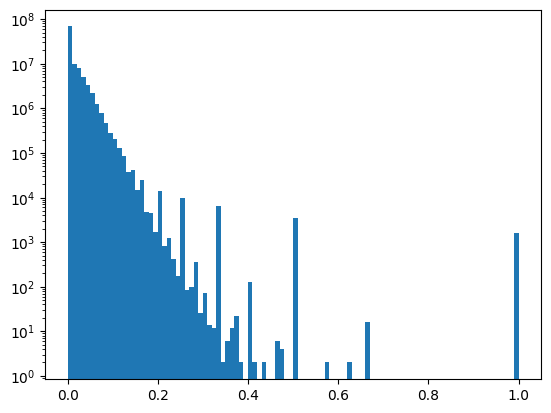

In [62]:
plt.hist(edge_weights.flatten(), bins=100, log=True)

In [63]:
graph =  build_graph(selected_users, edge_weights, 0)

In [64]:
# save graph
nx.write_gexf(graph, '../graph/iou_graph.gexf')

In [17]:
graph = nx.read_gexf('../graph/iou_graph.gexf')

### IOM

In [18]:
edge_weights = iom(selected_users, articles_per_user)

  1%|          | 12/1000 [00:00<00:27, 35.57it/s]

100%|██████████| 1000/1000 [00:13<00:00, 72.16it/s]


In [19]:
# Create an empty graph
graph = build_graph(selected_users, edge_weights, 0)

In [20]:
# save graph
nx.write_gexf(graph, '../graph/iom_graph.gexf')

Only take the top 10\% of the edges

In [21]:
# Calculate the threshold value for the top 10% of weights
threshold = np.percentile(edge_weights.flatten(), 95)

graph = build_graph(selected_users, edge_weights, threshold)

0.25925925925925924
49920


In [22]:
nx.write_gexf(graph, '../graph/iom_graph_10.gexf')

## Random Users >5 comments IOM

In [23]:
df = load_data()

In [24]:
# Get unique articles per user
articles_per_user = df.groupby('ID_CommunityIdentity')['ID_Article'].agg(set)
articles_per_user = articles_per_user[articles_per_user.apply(len) > 5].apply(list)

In [25]:
# select users with more than 10 comments
selected_users = articles_per_user.index.to_list()
selected_users = random.sample(selected_users, k=1000)

In [27]:
edge_weights = iom(selected_users, articles_per_user)

100%|██████████| 1000/1000 [00:06<00:00, 152.15it/s]


(array([7.75333e+05, 7.19000e+02, 3.55600e+03, 7.38800e+03, 9.36800e+03,
        1.54860e+04, 1.19990e+04, 1.83420e+04, 1.13120e+04, 1.07620e+04,
        1.35670e+04, 1.39290e+04, 1.69450e+04, 4.90300e+03, 1.50490e+04,
        6.16000e+03, 1.72280e+04, 2.68200e+03, 4.51200e+03, 1.27400e+03,
        4.82000e+03, 2.72300e+03, 3.52000e+03, 2.31100e+03, 4.64000e+02,
        5.48100e+03, 1.00700e+03, 1.41400e+03, 3.25200e+03, 4.73000e+02,
        1.58500e+03, 5.65000e+02, 2.37000e+02, 4.02300e+03, 3.03000e+02,
        5.00000e+02, 4.72000e+02, 9.95000e+02, 3.87000e+02, 1.09000e+02,
        4.70000e+02, 2.72000e+02, 7.46000e+02, 1.25000e+02, 2.96000e+02,
        1.91000e+02, 1.52000e+02, 6.60000e+01, 3.90000e+01, 4.00000e+00,
        1.11000e+03, 2.80000e+01, 3.50000e+01, 6.70000e+01, 7.10000e+01,
        9.00000e+01, 3.10000e+01, 1.97000e+02, 5.00000e+01, 1.00000e+01,
        5.20000e+01, 4.40000e+01, 7.00000e+01, 3.40000e+01, 2.60000e+01,
        1.60000e+01, 2.16000e+02, 5.00000e+00, 1.10

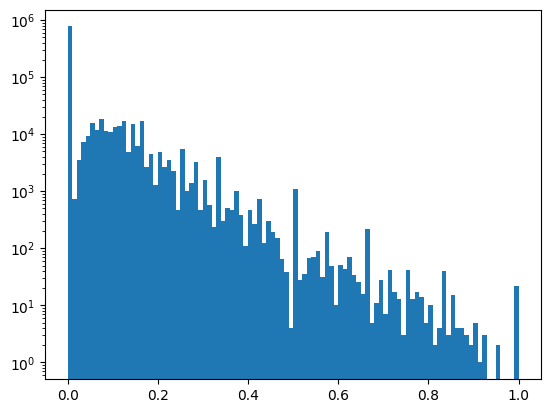

In [28]:
plt.hist(edge_weights.flatten(), bins=100, log=True)

In [29]:
# Calculate the threshold value for the top 10% of weights
threshold = np.percentile(edge_weights.flatten(), 95)

# Create an empty graph
graph = build_graph(selected_users, edge_weights, threshold)


0.16666666666666666
48145


In [30]:
nx.write_gexf(graph, '../graph/iom_graph.gexf')

## Filter By Channel

In [78]:
df = load_data()

In [79]:
df['ArticleChannel'].value_counts()

ArticleChannel
Inland           188069
Panorama          98391
Meinung           96008
Web               59589
International     55911
Wirtschaft        50755
Sport             40396
Etat              34890
Kultur            24013
User              12760
Wissenschaft      12565
Lifestyle         11124
Gesundheit        10490
Bildung            7942
dieStandard        7527
AutoMobil          6366
Immobilien         5071
Diverses           4597
Zukunft            4228
Reisen             3285
Familie            2658
Karriere           2459
Name: count, dtype: int64

In [80]:
df, articles_per_user, selected_users = filter_users(df, ['Sport', 'Wissenschaft'], min_articles= 5)

In [81]:
edge_weights = iom(selected_users, articles_per_user)

  0%|          | 0/1239 [00:00<?, ?it/s]

100%|██████████| 1239/1239 [00:04<00:00, 251.10it/s]


In [82]:
# Calculate the threshold value for the top 10% of weights
threshold = np.percentile(edge_weights.flatten(), 95)

# Create an empty graph
graph = build_graph(selected_users, edge_weights, threshold)


In [85]:
df_category_count = most_common_category_per_user(df)
print(df_category_count['most_common'].value_counts())

most_common
Sport           1014
Wissenschaft     225
Name: count, dtype: int64


In [48]:
nx.set_node_attributes(graph, df_category_count['most_common'].to_dict(), 'category')

In [49]:
nx.write_gexf(graph, '../graph/iom_graph_sport_wissenschaft.gexf')

### Using Wissenschaft, Sport and AutoMobil

In [86]:
df = load_data()

df, articles_per_user, selected_users = filter_users(df, ['Wissenschaft', 'Sport', 'AutoMobil'], min_articles= 5)

In [87]:
edge_weights = iom(selected_users, articles_per_user)

# Calculate the threshold value for the top 10% of weights
threshold = np.percentile(edge_weights.flatten(), 95)

graph = build_graph(selected_users, edge_weights, threshold)

  0%|          | 0/1362 [00:00<?, ?it/s]

100%|██████████| 1362/1362 [00:07<00:00, 193.18it/s]


In [89]:
df_category_count = most_common_category_per_user(df)
print(df_category_count['most_common'].value_counts())

most_common
Sport           1035
Wissenschaft     249
AutoMobil         78
Name: count, dtype: int64


In [90]:
nx.set_node_attributes(graph, df_category_count['most_common'].to_dict(), 'category')

In [91]:
nx.write_gexf(graph, '../graph/iom_graph_sport_wissenschaft_automobil.gexf')